**[LeetCode Link](https://leetcode-cn.com/problems/sliding-window-maximum/solution/hua-dong-chuang-kou-zui-da-zhi-by-leetcode-3/)**

## 暴力法
维护最大值和最大位置的简易遍历法

### 算法
* 首先`k`次循环初始化，标记最大值的位置`maxindex`
* 接下来滑窗的时候，如果`maxindex`被移出去，就重新循环`k`次找新的最大值；不然就比较`maxindex`和`nums[i]`谁大，然后更新最大值和最大值的位置。

In [ ]:
class Solution(object):
    def maxSlidingWindow(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: List[int]
        """
        # 从第m个开始, 之后k个中, 最大为第几个
        def find(m, k, nums):
            maxindex = m
            for i in range(m+1, m+k):
                if nums[i] > nums[res]:
                    maxindex = i
            # print(m, m+k-1, res)
            return maxindex
        
        # 初始从前k个找到最大的位置
        m = find(0, k, nums)
        res = [nums[m]]

        # 之后每次加入一个新的数
        for i in range(k, len(nums)):
            # 如果最大的从滑块左侧溢出, 找一个新的最大
            if i-k+1 > m:  
                m = find(i-k+1, k, nums)
            # 否则与新加入的进行比较, 更新
            elif nums[m] < nums[i]:
                # print(m)
                m = i
            res.append(nums[m])

        return res

## 双向队列
我们可以使用**双向队列**，该数据结构可以从两端以常数时间压入/弹出元素。

存储双向队列的索引比存储元素更方便，因为两者都能在数组解析中使用。

### 算法
* 处理前 `k` 个元素，初始化双向队列。
* 遍历整个数组。在每一步 :
* 清理双向队列 :
```
  - 只保留当前滑动窗口中有的元素的索引。
  - 移除比当前元素小的所有元素，它们不可能是最大的。
```
* 将当前元素添加到双向队列中。
* 将 `deque[0]` 添加到输出中。
* 返回输出数组。

### 复杂度分析
* 时间复杂度：$\mathcal{O}(N)$，每个元素被处理两次- 其索引被添加到双向队列中和被双向队列删除。
* 空间复杂度：$\mathcal{O}(N)$，输出数组使用了 $\mathcal{O}(N - k + 1)$ 空间，双向队列使用了 $\mathcal{O}(k)$。


In [ ]:
from collections import deque
class Solution:
    def maxSlidingWindow(self, nums: 'List[int]', k: 'int') -> 'List[int]':
        # base cases
        n = len(nums)
        if n * k == 0:
            return []
        if k == 1:
            return nums
        
        def clean_deque(i):
            # remove indexes of elements not from sliding window
            if deq and deq[0] == i - k:
                deq.popleft()
                
            # remove from deq indexes of all elements 
            # which are smaller than current element nums[i]
            while deq and nums[i] > nums[deq[-1]]:
                deq.pop()
        
        # init deque and output
        deq = deque()
        max_idx = 0
        for i in range(k):
            clean_deque(i)
            deq.append(i)
            # compute max in nums[:k]
            if nums[i] > nums[max_idx]:
                max_idx = i
        output = [nums[max_idx]]
        
        # build output
        for i in range(k, n):
            clean_deque(i)          
            deq.append(i)
            output.append(nums[deq[0]])
        return output

## 动态规划
将输入数组分割成有 `k` 个元素的块。若 `n % k != 0`，则最后一块的元素个数可能更少。

**开头元素为 i ，结尾元素为 j 的当前滑动窗口可能在一个块内，也可能在两个块中。**
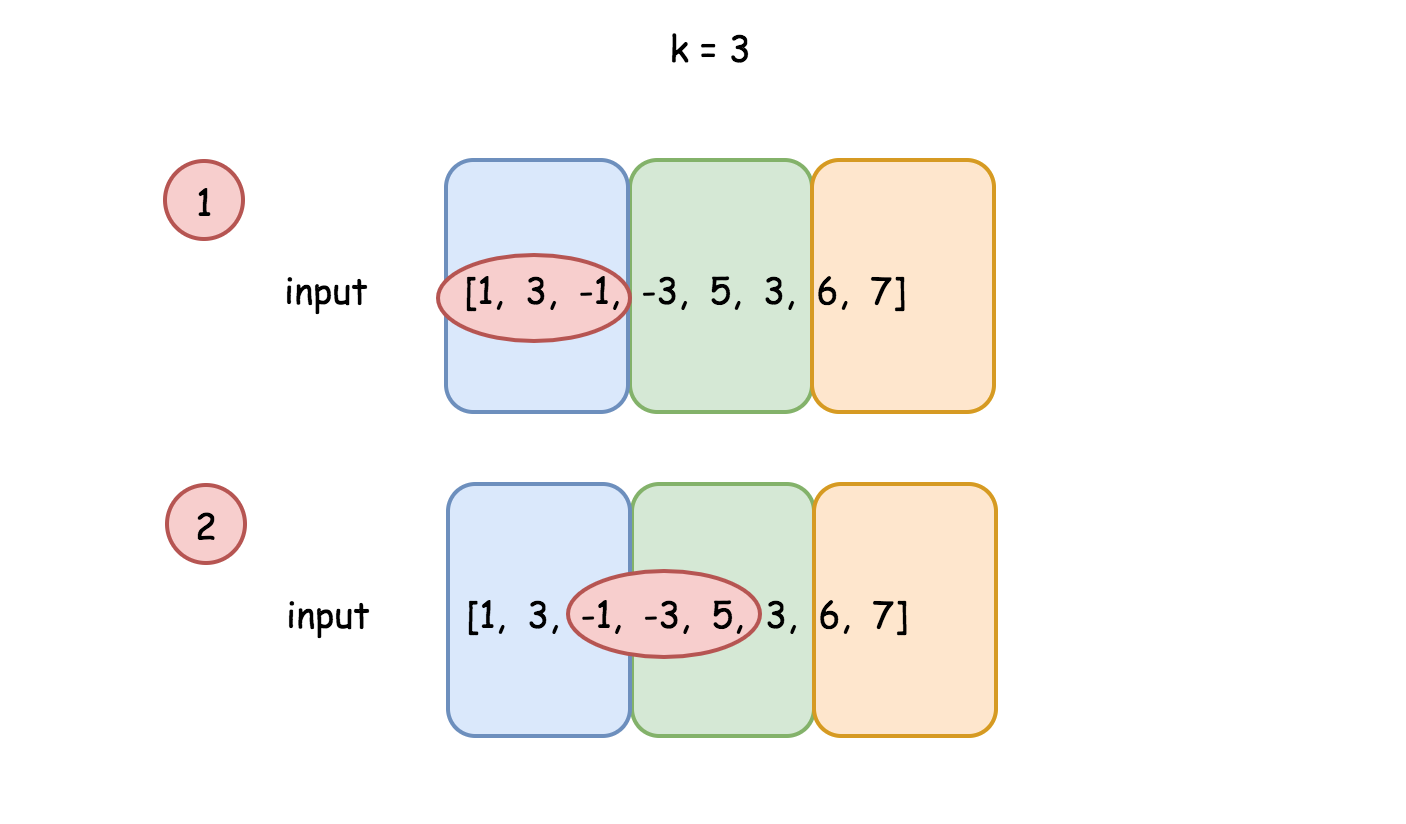

1. 情况 1 比较简单。 建立数组 `left`， 其中 `left[j]` 是从块的开始到下标 `j` 最大的元素，方向 `左->右`。
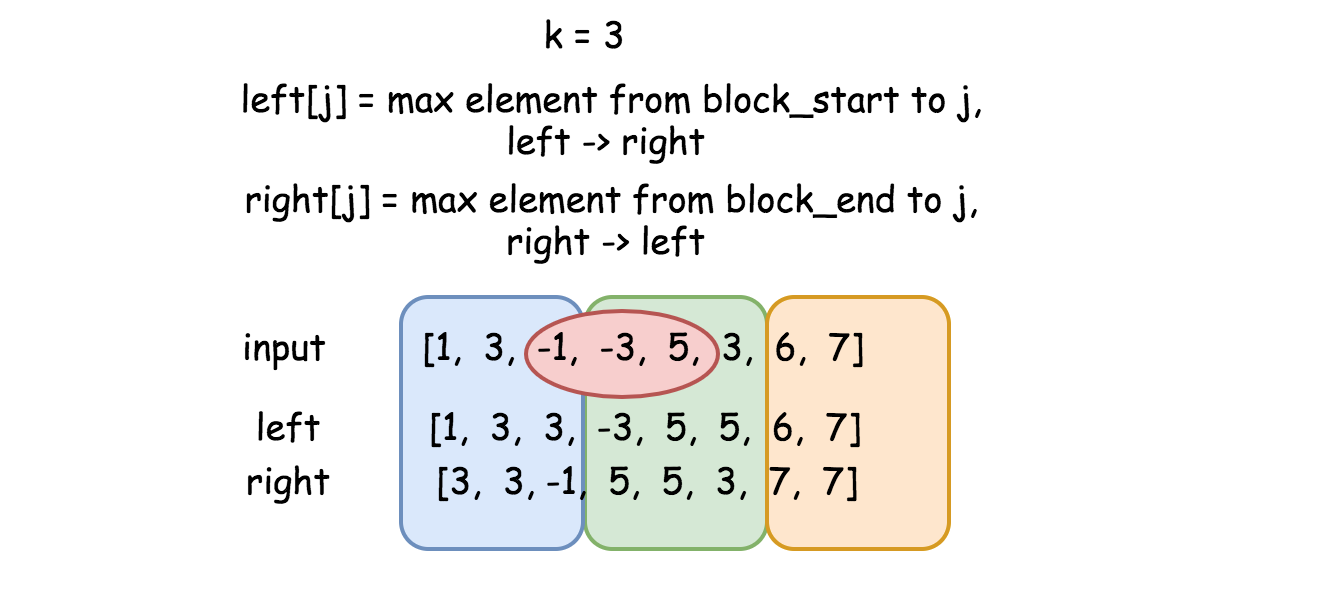
2. 为了处理更复杂的情况 2，我们需要数组 `right`，其中` right[j]` 是从块的结尾到下标 `j` 最大的元素，方向 `右->左`。`right` 数组和 `left` 除了方向不同以外基本一致。
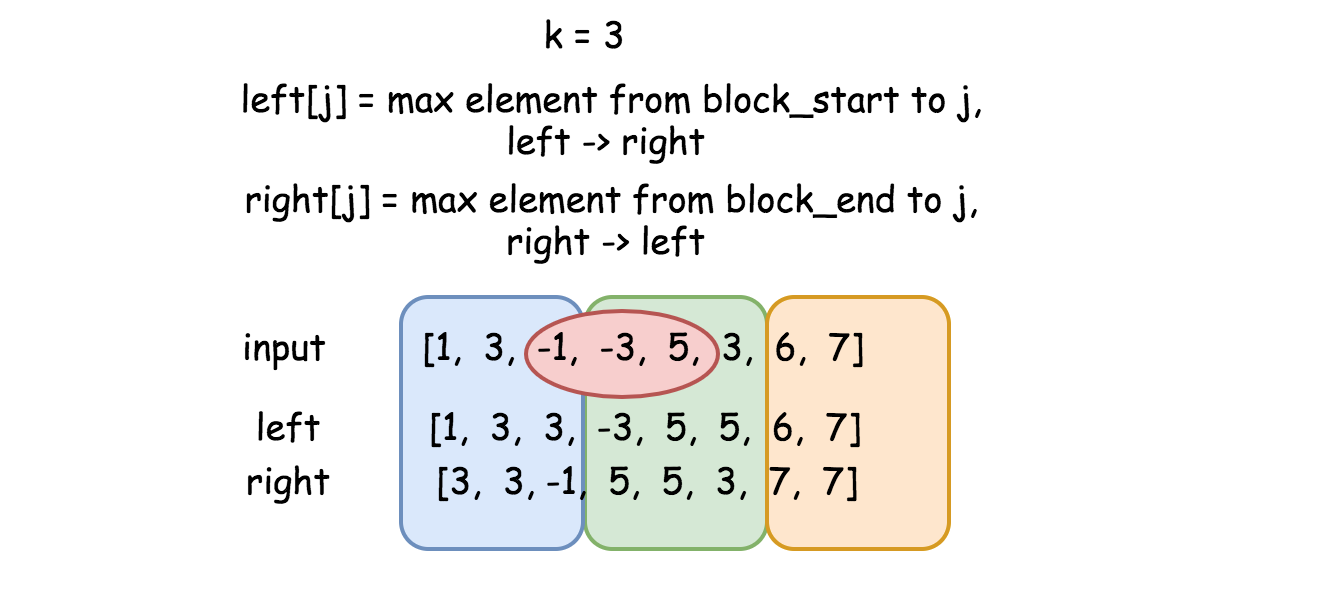
3. 两数组一起可以提供两个块内元素的全部信息。考虑从下标 `i` 到下标 `j` 的滑动窗口。 根据定义，`right[i]` 是左侧块内的最大元素， `left[j]` 是右侧块内的最大元素。因此滑动窗口中的最大元素为 `max(right[i], left[j])`。
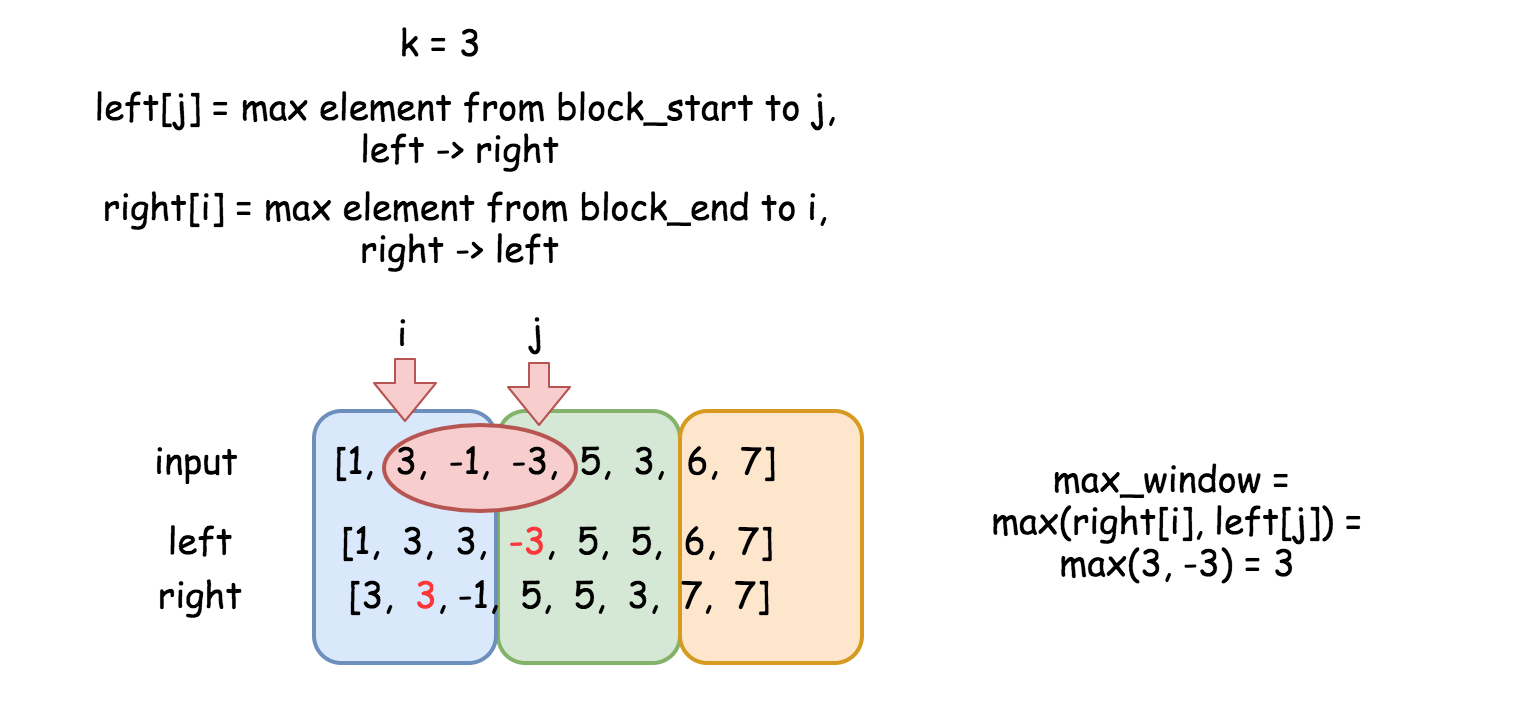

### 算法
* 从左到右遍历数组，建立数组 `left`。
* 从右到左遍历数组，建立数组 `right`。
* 建立输出数组 `max(right[i], left[i + k - 1])`，其中 `i` 取值范围为 `(0, n - k + 1)`。

### 复杂度分析
* 时间复杂度：$\mathcal{O}(N)$，我们对长度为 `N` 的数组处理了3次。
* 空间复杂度：$\mathcal{O}(N)$，用于存储长度为 `N` 的 `left` 和 `right` 数组，以及长度为 `N - k + 1` 的输出数组。

In [ ]:
class Solution:
    def maxSlidingWindow(self, nums: 'List[int]', k: 'int') -> 'List[int]':
        n = len(nums)
        if n * k == 0:
            return []
        if k == 1:
            return nums
        
        left = [0] * n
        left[0] = nums[0]
        right = [0] * n
        right[n - 1] = nums[n - 1]
        for i in range(1, n):
            # from left to right
            if i % k == 0:
                # block start
                left[i] = nums[i]
            else:
                left[i] = max(left[i - 1], nums[i])
            # from right to left
            j = n - i - 1
            if (j + 1) % k == 0:
                # block end
                right[j] = nums[j]
            else:
                right[j] = max(right[j + 1], nums[j])
        
        output = []
        for i in range(n - k + 1):
            output.append(max(left[i + k - 1], right[i]))
            
        return output